# Black Friday
>> by ***Kishan Bhat***

- Data is taken from Kaggle and from other competitions

- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
- The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
- Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

- Let's select are pre-requsits library and load them

In [1]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


### Due to masking the actual product name is not known.

Data
- Variable                  Definition
- User_ID	                User ID
- Product_ID                Product ID
- Gender	                Sex of User
- Age	                    Age in bins
- Occupation	            Occupation (Masked)
- City_Category	            Category of the City (A,B,C)
- Stay_In_Current_City_Years	Number of years stay in current city
- Marital_Status	        Marital Status
- Product_Category_1	    Product Category (Masked)
- Product_Category_2	    Product may belongs to other category also (Masked)
- Product_Category_3	    Product may belongs to other category also (Masked)
- Purchase	Purchase Amount (Target Variable)
* *Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data -(test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".*

We at our end, have the actual purchase amount for the test dataset, against which your predictions will be evaluated. Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:


Where y hat is the predicted value and y is the original value.

#### Data Overview
*Dataset has 537577 rows (transactions) and 12 columns (features) as described below:*

- User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
- Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
- Gender: indicates the gender of the person making the transaction.
- Age: indicates the age group of the person making the transaction.
- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
- Marital_Status: is 0 if the user is not married and 1 otherwise.
- Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
- Purchase: Purchase amount.

ML requiremnets

* Shap
* Eli5 (Permutation)
* OneHotEncode (assignning values)
* Clustermap
* Linear Regression

### Reading data

- Importing  data and reading

In [2]:
data_train_path='/kaggle/input/black-friday/train.csv'
data_test_path='/kaggle/input/black-friday/test.csv'
df_a = pd.read_csv(data_train_path)
df_b = pd.read_csv(data_test_path)
# We'll work and explore the above data sets.

In [3]:
df1 = df_a
df11 = df_b

In [4]:
list(df1.columns)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [5]:
df1.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_b_a = df_a.copy()
df_b_b = df_b.copy()

In [7]:
list(df1.columns)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Lets find the unique variable

  - As we can see that User_ID ,Product_ID  has large no of unique values due to which it is useless for machine learning 
  in later stage we'll drop it

In [9]:
df1.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

-Product_Category_2             72344
-Product_Category_3            162562
large no of data is missing we need to find out the pattern and decide to weather to drop or impute or fill

In [10]:
df1.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
list(df1.select_dtypes(include = np.number))

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

- Dropping Product_Category_3 as huge no off data is missing
- And we are imputing Product_Category_2 
- Method == ***Median()***

In [12]:
df1['Product_Category_2'].fillna(df1.Product_Category_2.median(), inplace=True)
df1.isna().sum()
# drop Product_Category_3 
df1.drop('Product_Category_3',axis=1,inplace = True)

In [13]:
df1.Stay_In_Current_City_Years

0          2
1          2
2          2
3          2
4         4+
          ..
550063     1
550064     3
550065    4+
550066     2
550067    4+
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [14]:
df1.Stay_In_Current_City_Years.replace("4+","4")

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

4.1 as to indicate +4 yrs of stay

In [15]:
df1.Stay_In_Current_City_Years = df1.Stay_In_Current_City_Years.replace("4+","4.1").astype("float")
print(df1.Stay_In_Current_City_Years)

0         2.0
1         2.0
2         2.0
3         2.0
4         4.1
         ... 
550063    1.0
550064    3.0
550065    4.1
550066    2.0
550067    4.1
Name: Stay_In_Current_City_Years, Length: 550068, dtype: float64


Using mapping we place male as 1 and female as  2 for purpose to use this efficently in data analysis

In [16]:
df1['GEN_1'] = df1.Gender.map({'M':1,'F':2})

In [17]:
list(df1.columns)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Purchase',
 'GEN_1']

## Exploratory Data Analysis

lets get on with explorattion and look out for any key patterns

In [18]:
# sns.pairplot(df1.drop(columns = ['User_ID','Product_ID']).select_dtypes(include = np.number))

- Its checks out more no of male are present during the black friday sale copared to females

<AxesSubplot:title={'center':'Gender count'}, xlabel='GEN_1', ylabel='count'>

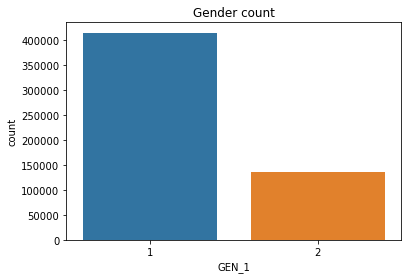

In [19]:
plt.xlabel('Plot Number')
plt.title('Gender count')
sns.countplot(x = df1.GEN_1,data = df1)

So from the below plot & list we can say that on an average ppl staying for around 4+ yrs are the one to buy most from sale,followed by 3yrs,2yrs,1 yrs respectively

In [20]:
df1.groupby('Stay_In_Current_City_Years').Stay_In_Current_City_Years.sum().sort_values(ascending =False)

Stay_In_Current_City_Years
4.1    347376.6
3.0    285855.0
2.0    203676.0
1.0    193821.0
0.0         0.0
Name: Stay_In_Current_City_Years, dtype: float64

Text(0.5, 0, 'NO. of years')

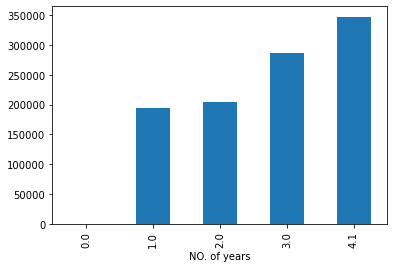

In [21]:
df1.groupby('Stay_In_Current_City_Years').Stay_In_Current_City_Years.sum().sort_values(ascending = False).plot(kind = 'bar').set_xlabel("NO. of years")

#### Inference
- Looking at below plots we can see that age grp of **26-35** are the highest in the grp following **36-45**,**18-25**,**51-55** respectively
- In city category we can see that category **B** is more followed by **A** and **C** respectively
- Regarding maritial status Unmarried ppls do buy more compared to Other

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

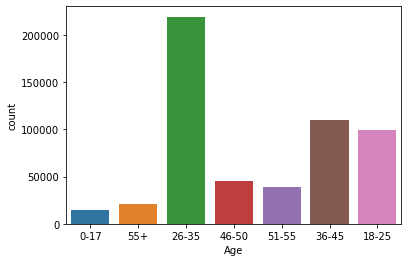

In [22]:
sns.countplot(df1.Age)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City_Category', ylabel='count'>

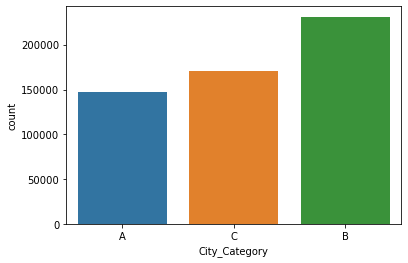

In [23]:
sns.countplot(df1.City_Category)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

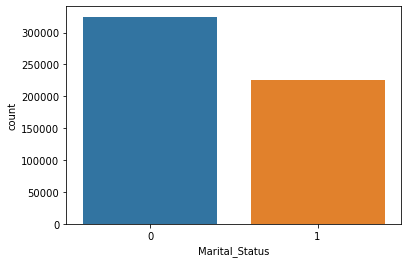

In [24]:
sns.countplot(df1.Marital_Status)


P00265242,P00112142,P00025442,P00110742,P00046742  
- these are top 5 selling products during black friday sale

In [25]:
df1.Product_ID.value_counts().head(50)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00270942    1152
P00000142    1152
P00112542    1131
P00044442    1111
P00334242    1093
P00111142    1015
P00277642     989
P00052842     982
P00116842     979
P00295942     972
P00005042     969
P00003442     968
P00086442     966
P00258742     964
P00085942     963
P00110542     958
P00216342     943
P00073842     936
P00128942     936
P00113242     933
P00112442     923
Name: Product_ID, dtype: int64

<AxesSubplot:>

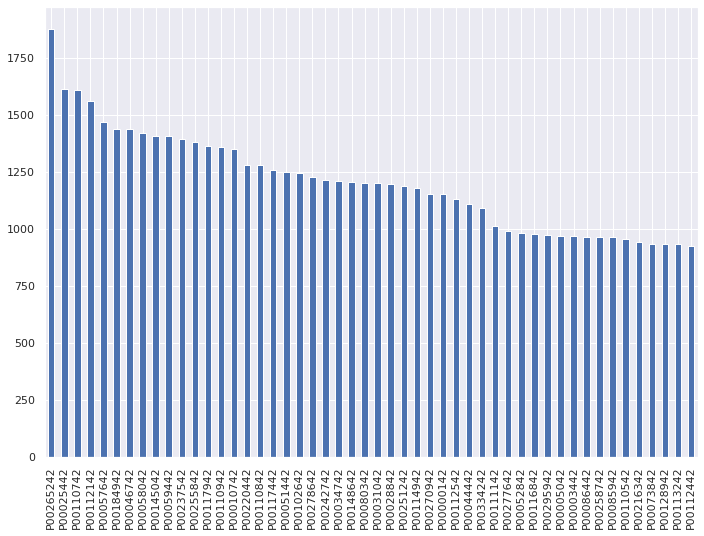

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation = 90)
df1.Product_ID.value_counts().head(50).plot(kind = 'bar')

* Product_Category_2 has the product  9.0 selling highest followed by product 8
* Product_Category_1 has the product 8 selling best followed by 5 
#### Due to masking the actual product name is not known.

<AxesSubplot:>

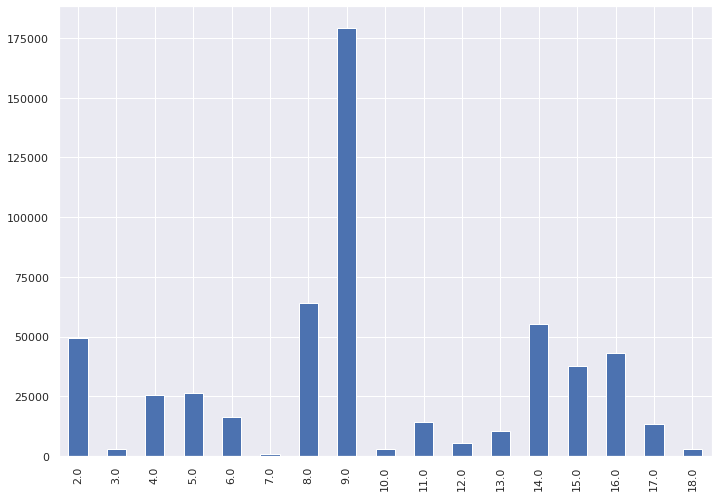

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation = 90)
df1.Product_Category_2.value_counts(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

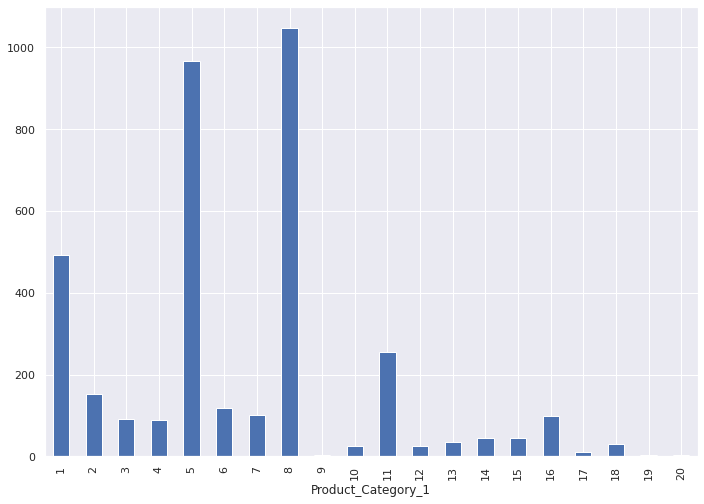

In [28]:
df1.groupby('Product_Category_1')['Product_ID'].nunique().plot(kind = 'bar')

<AxesSubplot:>

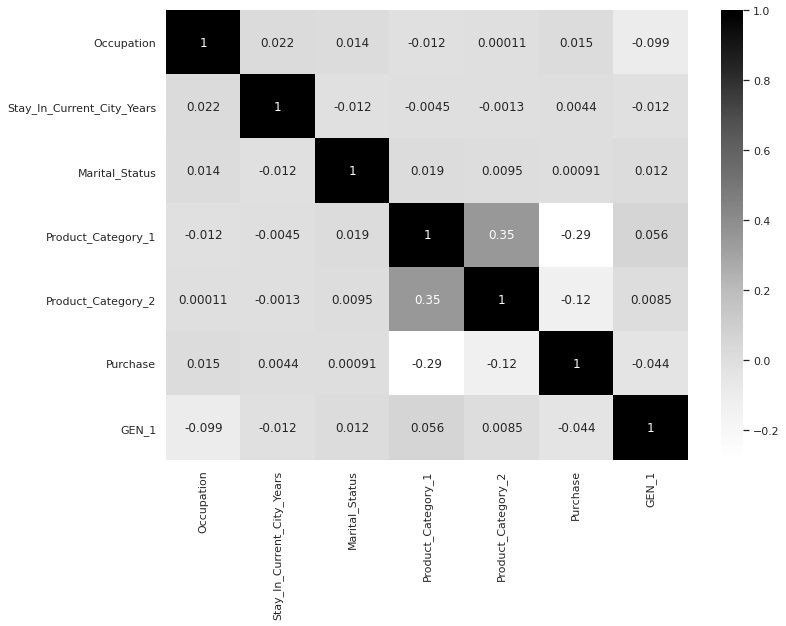

In [29]:
sns.heatmap(df1.drop(columns=['User_ID','Product_ID']).select_dtypes(include = np.number).corr(method = "kendall"),cmap='Greys',annot = True)

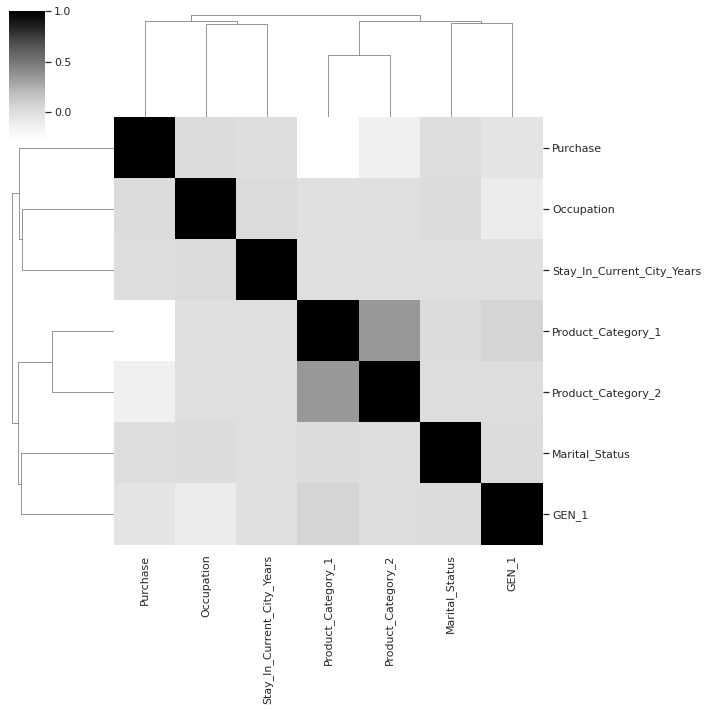

In [30]:
sns.clustermap(df1.drop(columns=['User_ID','Product_ID']).select_dtypes(include = np.number).corr(method = "kendall"),cmap='Greys' )

In [31]:
 data_1 = df1.iloc[:,-4:-1]
print(pd.DataFrame(data_1))

        Product_Category_1  Product_Category_2  Purchase
0                        3                 9.0      8370
1                        1                 6.0     15200
2                       12                 9.0      1422
3                       12                14.0      1057
4                        8                 9.0      7969
...                    ...                 ...       ...
550063                  20                 9.0       368
550064                  20                 9.0       371
550065                  20                 9.0       137
550066                  20                 9.0       365
550067                  20                 9.0       490

[550068 rows x 3 columns]


In [32]:
df11.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

## Statistical analysis

##### OneHotEncoder

- We can also us pd_get_dummies to get encoding but we will follow traditional approach

In [33]:
print(df11.shape)

print(df1.shape)

(233599, 11)
(550068, 12)


In [34]:
df11['Product_Category_2'].fillna(df11.Product_Category_2.median(), inplace=True)
df11.isna().sum()
# drop Product_Category_3 
df11.drop('Product_Category_3',axis=1,inplace = True)

###### We Are using test data set for analysis

In [35]:
# drop User_ID and Product_ID
df1.drop(columns = ['User_ID','Product_ID'],inplace = True)

In [36]:
df1.Purchase

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [37]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
# get categorical features and review number of unique values
cat=df1.select_dtypes(exclude= np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())
# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)
# merge with numeric data
num = df1.drop(columns =cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Number of unique values per categorical feature:
 Gender           2
Age              7
City_Category    3
dtype: int64


,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,GEN_1
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,2.0,0,3,9.0,8370,2
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,2.0,0,1,6.0,15200,2
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,2.0,0,12,9.0,1422,2
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,2.0,0,12,14.0,1057,2
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16,4.1,0,8,9.0,7969,1


In [38]:
df2.columns

Index(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'GEN_1'],
      dtype='object')

findings : Rmse is  smaller than median value indicating good model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#  perform train-test split using Purchase as target 
X = df2.drop(columns='Purchase')
y = df2['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# Compare both
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  4696.210377137129
Median value of target variable:  8047.0


- age,gender,city category,product category , occupation , stay , martital are listed according to the weights

In [45]:
import eli5 
from eli5.sklearn import  PermutationImportance
perm =PermutationImportance(model,random_state=1).fit(X_train,y_train)
eli5.show_weights(perm,feature_names = X_test.columns.tolist(),top = 5)

>  ## Conclusion

1. During exploration we have see that more no of men do shopping in the stores compared to women.
2. people have 4+ stay years do more shopping follwed by 3 yrs residents showing a trend that longer they stay they tend to shop more.
3. Unmarried people seem to do more shopping during the black friday sale compared to Married people, this shows the trend of bachelors being
   more involved in the sale.
4. As we have seen that product1 & 2 there are some goods they sell more compared to the rest, 
5. so its best if we provide on **Multi-buys**,**conditional**,coupons/offers on that irresepective of black friday sale they tend to be doing good, rest low      performing products needs to cleaned/sold off inorder to make space.
6. Suggesting use of coupons and offers on low performing product(**BOGO strategy**)

#### Suggestions
1. Focus more on bacholers and Formulate the strategy according to the target Customer
2. Focus on the residents that are loyal to store and use programs such as giving loyality program that'll help to get precise data and give them special feeling
3. Depending on strategies Use coupon/offers to make the products go off the shelf